In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
%matplotlib inline 

In [2]:
churnData = pd.read_csv('DATA_Customer-Churn.csv')

In [3]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [4]:
churnData.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
churnData['TotalCharges'] = pd.to_numeric(churnData["TotalCharges"], errors='coerce', downcast=None)

In [7]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
churnData.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [9]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#fill Nan with mean

In [11]:
#Finding the mean of the column having NaN 
mean_value=churnData['TotalCharges'].mean() 
  
# Replace NaNs in column S2 with the 
# mean of values in the same column 
churnData['TotalCharges'].fillna(value=mean_value, inplace=True)

In [12]:
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
#`tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:

In [14]:
X = churnData[["tenure","SeniorCitizen","MonthlyCharges","TotalCharges"]]

In [15]:
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [16]:
y = churnData['Churn']

In [17]:
y = y.apply(lambda x: 1 if x=='Yes' else 0)

In [18]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [19]:
#split the Data in train and test

In [20]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=42)

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'SeniorCitizen'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

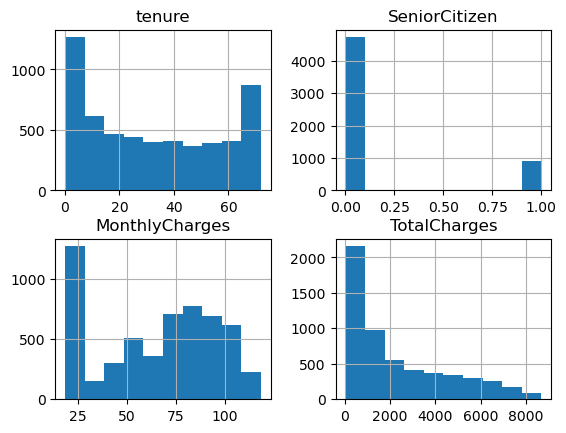

In [21]:
X_train.hist()

In [22]:
#make new DF for x_train and x_test without Senior Citizens and concat it later with old 

In [23]:
X_train_without = X_train.drop(['SeniorCitizen'], axis=1)

In [24]:
X_train_without

,tenure,MonthlyCharges,TotalCharges
2142,21,64.85,1336.800000
1623,54,97.20,5129.450000
6074,1,23.45,23.450000
1362,4,70.20,237.950000
6754,0,61.90,2283.300441
...,...,...,...
3772,1,95.00,95.000000
5191,23,91.10,2198.300000
5226,12,21.15,306.050000
5390,12,99.45,1200.150000


In [25]:
X_test_without = X_test.drop(['SeniorCitizen'], axis = 1)

In [26]:
X_test_without

,tenure,MonthlyCharges,TotalCharges
185,1,24.80,24.80
2715,41,25.25,996.45
3825,52,19.35,1031.70
1807,1,76.35,76.35
132,67,50.55,3260.10
...,...,...,...
6366,64,68.30,4378.80
315,51,110.05,5686.40
2439,17,19.90,329.75
5002,69,43.95,2960.10


In [27]:
#use StandartScaler but not on Senior Citizens

In [28]:
scaler = StandardScaler()
scaler.fit(X_train_without)
X_train_scaled = scaler.transform(X_train_without)
X_test_scaled = scaler.transform(X_test_without)

In [29]:
# make X.. a DF and add senior citizens

In [30]:
X_test_without1 = pd.DataFrame(X_test_without, columns = X_test_without.columns, index= X_test.index)

In [31]:
X_test_without1

,tenure,MonthlyCharges,TotalCharges
185,1,24.80,24.80
2715,41,25.25,996.45
3825,52,19.35,1031.70
1807,1,76.35,76.35
132,67,50.55,3260.10
...,...,...,...
6366,64,68.30,4378.80
315,51,110.05,5686.40
2439,17,19.90,329.75
5002,69,43.95,2960.10


In [32]:
X_test_without1['SeniorCitizen'] = X_test['SeniorCitizen']

In [33]:
X_test_without1

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
185,1,24.80,24.80,0
2715,41,25.25,996.45,0
3825,52,19.35,1031.70,0
1807,1,76.35,76.35,0
132,67,50.55,3260.10,0
...,...,...,...,...
6366,64,68.30,4378.80,0
315,51,110.05,5686.40,0
2439,17,19.90,329.75,0
5002,69,43.95,2960.10,0


In [34]:
#do the same with X_train

In [35]:
X_train_without1 = pd.DataFrame(X_train_without, columns = X_train_without.columns, index= X_train.index)

In [36]:
X_train_without1['SeniorCitizen'] = X_train['SeniorCitizen']

In [37]:
X_train_without1

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
2142,21,64.85,1336.800000,0
1623,54,97.20,5129.450000,0
6074,1,23.45,23.450000,0
1362,4,70.20,237.950000,0
6754,0,61.90,2283.300441,0
...,...,...,...,...
3772,1,95.00,95.000000,0
5191,23,91.10,2198.300000,0
5226,12,21.15,306.050000,0
5390,12,99.45,1200.150000,1


In [38]:
log_model = LogisticRegression() 



#where the magic happens

log_model.fit(X_train_without1, y_train)

y_pred_train_log = log_model.predict(X_train_without1)
y_pred_test_log = log_model.predict(X_test_without1)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.786475,0.810504
1,Precision,0.640460,0.719008
2,Recall,0.446524,0.466488


In [ ]:
#use KNN

In [41]:
model = KNeighborsClassifier(n_neighbors=5,weights='uniform') # declare we're using knn classification model
model.fit(X_train_without1, y_train) # train model
y_pred = model.predict(X_test_without1) # predict test
y_pred_train=model.predict(X_train_without1) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.828541,0.782825
1,Precision,0.736607,0.615120
2,Recall,0.551471,0.479893
